<a href="https://colab.research.google.com/github/Smarth2005/Machine-Learning/blob/main/SVM%20Kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SVM Kernels

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [ ]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)


x1 = np.hstack([x1, -x1])
y1 = np.hstack([y1, -y1])

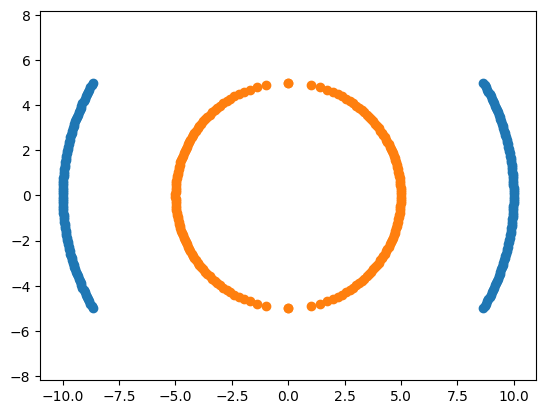

In [ ]:
plt.scatter(y,x)
plt.scatter(y1,x1)
plt.axis('equal')
plt.show()

In [ ]:
import pandas as pd

df1 = pd.DataFrame(np.vstack([y,x]).T, columns = ['X1','X2'])
df1['Y'] = 0

df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns = ['X1','X2'])
df2['Y'] = 1

df = pd.concat([df1, df2], ignore_index=True)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [ ]:
# Independent and Dependent features
X = df.iloc[:, :2]
y = df.Y

In [ ]:
y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [ ]:
# Split the dataset into train and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = "linear")
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred)

0.45

When we applied a linear kernel to this dataset, the model achieved an accuracy of only 45%, indicating that the data is not linearly separable.

### Polynomial Kernel

The polynomial kernel is defined as:

$$
K(x, y) = (x^\top y + c)^d
$$

- $x, y$  are input vectors  
- $c$  is a constant (commonly c = 1)  
- $d$  is the degree of the polynomial



In [ ]:
# We need to find components for the Polynomial Kernel
# X1,X2, X1_square, X2_square, X1*X2
df['X1_square'] = df['X1']**2
df['X2_square'] = df['X2']**2
df['X1*X2']     = (df['X1']*df['X2'])
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [ ]:
# Independent and dependent features
X = df[['X1','X2','X1_square','X2_square','X1*X2']]
y = df['Y']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
x_train

,X1,X2,X1_square,X2_square,X1*X2
250,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
312,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
283,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
323,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


> ℹ️ **Note:**  Plotly interactive charts will not render correctly on GitHub preview.  
> To see the visualizations properly, **please open and run this notebook in Google Colab** to experience the full interactivity.


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2', color='Y')
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='X1_square', y='X2_square', z='X1*X2', color='Y')
fig.show()

In [ ]:
classifier = SVC(kernel="linear")
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

### Radial Basis Function Kernel

In [ ]:
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [ ]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)


x1 = np.hstack([x1, -x1])
y1 = np.hstack([y1, -y1])

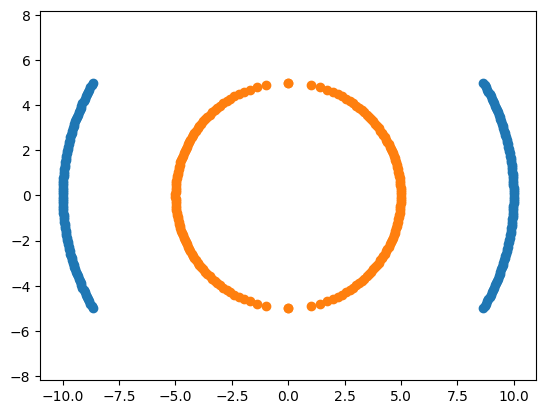

In [ ]:
plt.scatter(y,x)
plt.scatter(y1,x1)
plt.axis('equal')
plt.show()

In [ ]:
import pandas as pd

df1 = pd.DataFrame(np.vstack([y,x]).T, columns = ['X1','X2'])
df1['Y'] = 0

df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns = ['X1','X2'])
df2['Y'] = 1

df = pd.concat([df1, df2], ignore_index=True)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [ ]:
# Independent and Dependent features
X = df.iloc[:, :2]
y = df.Y

In [ ]:
# Split the dataset into train and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = "rbf")
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

1.0